# AnyoneAI - Project II

# Making Estimations with our NBA dataset

In our first project, we learn how to create our own datasets by using a public API, Python and Pandas. We're now going to explore how to make predictive models for regression and classification tasks using ScikitLearn

The goals of this project are:
- Learn how to define a prediction task
- Selecting evaluation metrics and baseline models
- Perform feature engineering and standarization
- Training and using predictive models: Univariable and Multivariate Linear Regression, Classification
- Understand how Gradient Descent works by implementing a Linear Regressor in python

## Using Regression Models to Estimate players Salaries

A player's salary can be explained by a lot of factors: 

- Years in the league: NBA contracts are limited in price, players have caps on how much money they make depending on their years playing in the league
- Age: Highly correlated to the previous one, NBA players have a minimun age of 19 years
- Draft position: players out of USA universities are selected each year through a process called draft, in which each team selects a player in a predefined order for 2 rounds (meaning only 60 players are drafted each year). A rookie contract value depends on the draft position. (Undrafted players have to negotiate a salary independently)
- Performance in statistical categories: after the rookie contract, players can negotiate freely with teams, and usually statistical categories like points, rebounds and assists are extremely important.  
- Team: Even though there are limits to what all teams can expend in players salary, they all allocate their resources differently, and can be more willing to pay the penalties incurred by exceeding those limitations.
- Year in which the contract was signed: the mininum and maximum values of contracts possibles in the NBA changes depending on league revenue (television contracts, sponsorships, etc), so if the amount of money the teams make increases, players can negotiate bigger contracts.
- Intangibles: players can be valued also in things that are not easily translated to a statistic, good defensive players might not always have great stats but can be extremely important for a team, the same can be said about veteran players that help young ones to learn and are good locker-room guys.

But we're going to take a simplified approach, we'll try to use the data we already have to make the best estimator possible, and then we will analyze what went right and what could've gone wrong with our results.

### Analyzing our data

In [ ]:
import pandas as pd
data = pd.read_csv("https://raw.githubusercontent.com/anyoneai/notebooks/main/datasets/project2_players_df.csv")
data.dropna(subset=["PTS"], inplace=True)

In [ ]:
!pip install category_encoders
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
import category_encoders as ce
from sklearn.linear_model import LinearRegression
import numpy as np

from sklearn.linear_model import SGDRegressor

from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression

import warnings

from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import OneHotEncoder
import plotly.express as px


from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

Let's have another look at our previously generated dataset. 

1.1. Plot all players statistics ("PTS", "REB", "AST","STL","BLK") against salary

The previous graphics were better but they didn't load :p

<AxesSubplot:xlabel='REB', ylabel='Salary'>

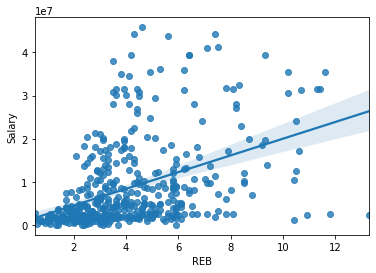

In [ ]:
sns.regplot(x=data['REB'], y=data['Salary'])

<AxesSubplot:xlabel='REB', ylabel='Salary'>

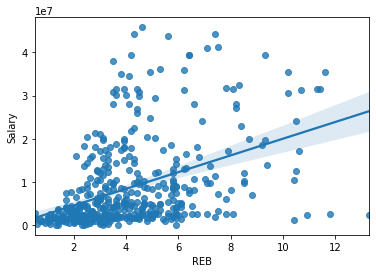

In [ ]:
sns.regplot(x=data['REB'], y=data['Salary'])


<AxesSubplot:xlabel='AST', ylabel='Salary'>

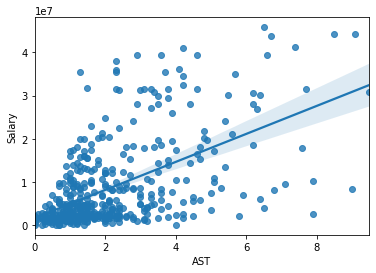

In [ ]:
sns.regplot(x=data['AST'], y=data['Salary'])


<AxesSubplot:xlabel='STL', ylabel='Salary'>

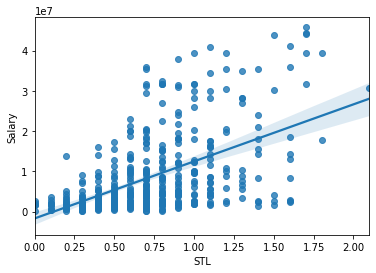

In [ ]:
sns.regplot(x=data['STL'], y=data['Salary'])

<AxesSubplot:xlabel='BLK', ylabel='Salary'>

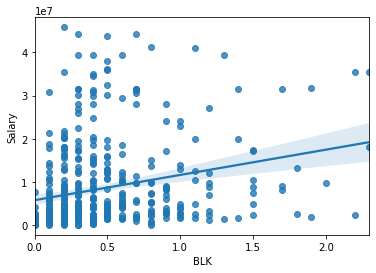

In [ ]:
sns.regplot(x=data['BLK'], y=data['Salary'])


1.2. What can we say about these distributions?

Those who score more points tend to earn more wages and the same thing happens with thefts and assistance and 
the data is corelated to salary

### Splitting the Dataset

1.3. Split the dataset into train and testing sets. Use the Sklearn function for train/test splitting. Make sure to set the random state for reproducibility.

In [ ]:
y = data.Salary

X = data.drop("Salary", axis=1) 


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=8)




### Baseline Model and Evaluation Metric

In every project, we need a baseline model that implements a very simple algorithm or heuristic so we can compare our results with it. 
In this case, we could create a function that always returns the average player salary, evaluate that, and then compare the result with our modeling to see if we are improving. 

We need an evaluation metric to see how well our models fit the data. For this project we will use [Mean Absolute Error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html#sklearn.metrics.mean_absolute_error) as our regression evaluation metric, because it is a really simple metric to interpret. A lower value means the model performs better. 

For this particular problem, we will always round the value, as we don't need decimals for this task.

1.4. Create a Baseline model class that implements  fit() and predict() methods. As this model will not consider any other variable, the fit method should only receive a list of all players salaries. The predict method should receive and iterable and return a numpy array with the same length but every element should have the same value (the average salary)

In [ ]:
class BaselineModel():
    """A baseline model that always returns the same value, the mean of the players salary in the train data"""
    
    def fit(self, y_train):
        """
        Fit the training data. 
        
        
        
        Parameters
        ----------
        y_train: Union[pd.Series, np.ndarray]
            a pandas series or numpy array containing salary information
            
        """
        self.mean = np.mean(y_train)

    def predict(self, X):
        
        
        """
        Predict salaries 
        
        Parameters
        ----------
        X: Union[pd.DataFrame, pd.Series, np.ndarray]
            a pandas series, dataframe or numpy array with the 
        
        Returns
        
        -------
    
        np.ndarray
            a numpy array of the same length as X, with all elements equal to the mean salary calculated in fit()
        """
        self.X = len(X)
        
        return np.array(([self.mean] * self.X)) 




    




        

1.5. Evaluate the performance of our BaselineModel on the test set using mean_absolute_error from Sklearn (round the result)

In [ ]:
bm = BaselineModel()

bm.fit(y_train)


y_pred = bm.predict(X_test)

baseline_mae = mean_absolute_error(y_pred, y_test)

baseline_mae = round(baseline_mae, 2)

baseline_mae

7640684.55

### Regression with a single variable

You're now going to start modeling data. We will start with a really simple approach, selecting just one variable, and doing a regression to see if we improve upon our baseline.


1.6. Select the variable you think would provide the best fit. Perform feature scaling on this variable using a Sklearn scaler.

In [ ]:
corr_data = data.corr(method='pearson')
corr_data.style.background_gradient(cmap='coolwarm')


,PERSON_ID,HEIGHT,WEIGHT,SEASON_EXP,GP,MIN,PTS,REB,AST,STL,BLK,Salary
PERSON_ID,1.000000,-0.017570,-0.145253,-0.832962,-0.828859,-0.435296,-0.378228,-0.327192,-0.280584,-0.360630,-0.191265,-0.410941
HEIGHT,-0.017570,1.000000,0.742002,0.013805,0.004698,-0.089180,-0.045152,0.512521,-0.414416,-0.257846,0.582225,0.017026
WEIGHT,-0.145253,0.742002,1.000000,0.175218,0.170504,0.022660,0.076494,0.580162,-0.290901,-0.146846,0.542029,0.091361
SEASON_EXP,-0.832962,0.013805,0.175218,1.000000,0.977818,0.525627,0.463190,0.396618,0.344374,0.440100,0.230110,0.455904
GP,-0.828859,0.004698,0.170504,0.977818,1.000000,0.579935,0.512884,0.427197,0.382122,0.472999,0.245824,0.494023
MIN,-0.435296,-0.089180,0.022660,0.525627,0.579935,1.000000,0.889919,0.586104,0.674615,0.753779,0.292521,0.639290
PTS,-0.378228,-0.045152,0.076494,0.463190,0.512884,0.889919,1.000000,0.566228,0.675474,0.629975,0.273726,0.732907
REB,-0.327192,0.512521,0.580162,0.396618,0.427197,0.586104,0.566228,1.000000,0.214233,0.356387,0.714334,0.435228
AST,-0.280584,-0.414416,-0.290901,0.344374,0.382122,0.674615,0.675474,0.214233,1.000000,0.727288,-0.074422,0.560400
STL,-0.360630,-0.257846,-0.146846,0.440100,0.472999,0.753779,0.629975,0.356387,0.727288,1.000000,0.141599,0.532968


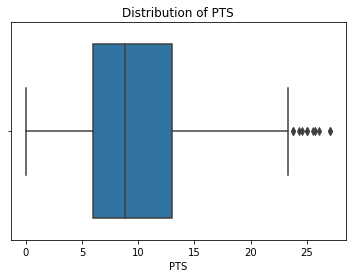

In [ ]:
sns.boxplot(data=data, x='PTS').set_title('Distribution of PTS')
plt.show()



In [ ]:
colum_name = ["PTS"]

features = data[colum_name]

scaler = StandardScaler()


data[colum_name] = scaler.fit_transform(features.values).reshape(-1,1)




In [ ]:
y = data.Salary

features = ["PTS"] 
X = data[features]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=8)


1.7. Train a model with [SGDRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html) from Sklearn using the default parameters. Evaluate the model's performance on the test set using the selected metric.

In [ ]:

sgd_reg = SGDRegressor(loss='squared_error', penalty='l2', alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=1000, tol=0.001, shuffle=True, verbose=0, epsilon=0.1, random_state=None, learning_rate='invscaling', eta0=0.01, power_t=0.25, early_stopping=False, validation_fraction=0.1, n_iter_no_change=5, warm_start=False, average=False)

sgd_reg.fit(X_train, y_train)

test_pred = sgd_reg.predict(X_test)


default_mae = mean_absolute_error(y_test, test_pred)


default_mae = round(default_mae, 2)

1.8. Read the Sklearn documentation, and write a function that tries different configurations for the hyperparameters for training: epochs, learning rate and alpha. For each combination of parameters, evaluate the trained algorithm on the test set, then save the results of each hyperparameter combination, finally select the one that has the best MAE (meaning the lowest number) and print the combination and the MAE.

In [ ]:
def search_best_hyperparameters(max_iter, eta0):
    result = {
        "hyperparameters": {"max_iter": None, "eta0": None}, 
        "mae": None
    }
    eta0 = [0.0001, 0.001, 0.01, 0.1]
    max_iter = [1000, 1000000]

    mae_list =  []
    parameters = []
    for i in max_iter:
        for j in eta0:
                parameters.append( ( i, j ) )
                sgd_reg = SGDRegressor(max_iter = i, eta0= j)

                sgd_reg.fit(X_train, y_train)

                test_pred = sgd_reg.predict(X_test)

                mae = mean_absolute_error(y_test, test_pred)
                    
                mae_list.append(mae)
                    
                    
                    
                mae_array = np.array(mae_list)
    result = {
    "hyperparameters": {"max_iter": parameters[np.argmin(mae_array)][0], "eta0": parameters[np.argmin(mae_array)][1]}, 
    "mae": np.min(mae_array)
    }
 
 
    
    return result

In [ ]:
    eta0 = [0.0001, 0.001, 0.01, 0.1]
    max_iter = [1000, 1000000]

    mae_list =  []
    parameters = []
    for i in max_iter:
        for j in eta0:
                parameters.append( ( i, j ) )
                sgd_reg = SGDRegressor(max_iter = i, eta0= j)

                sgd_reg.fit(X_train, y_train)

                test_pred = sgd_reg.predict(X_test)

                mae = mean_absolute_error(y_test, test_pred)
                    
                mae_list.append(mae)
                    
                    
                    
                mae_array = np.array(mae_list)
                warnings.filterwarnings('ignore')   

In [ ]:
best_mae = np.min(mae_array)
best_mae = round(best_mae, 2)

In [ ]:
# Example list of hyperparameters values
max_iter = [1000, 1000000]
eta0 = [0.0001, 0.001, 0.01, 0.1]

result = search_best_hyperparameters(max_iter, eta0)
print(result)

{'hyperparameters': {'max_iter': 1000, 'eta0': 0.0001}, 'mae': 4883637.814317507}


1.9. Compare the results of the baseline, the SGDRegressor with default parameters and the one with the best combination of hyperparameters you could find. (replace variables with the ones you used)

In [ ]:
print("Mean Absolute Error for each model:")
print(f"Baseline: {baseline_mae}")
print(f"Default SGDRegressor: {default_mae}")
print(f"Best SGDRegressor: {best_mae}")

Mean Absolute Error for each model:
Baseline: 7640684.55
Default SGDRegressor: 5010806.67
Best SGDRegressor: 4883892.44


### Multivariate Linear Regression

To improve our model, we will add more features to it. We will have to do some processing to our dataset to be able to use the data.
We'll start with the following variables:

- Points
- Rebounds
- Assists
- Blocks
- Experience
- Position
- Draft Number


1.10. Create a copy of the dataset generated in the first project that only has the following columns (and player id as an index):

["PTS", "REB", "AST", "BLK", "SEASON_EXP", "POSITION", "DRAFT_NUMBER", "SALARY", "TEAM_NAME"]

In [ ]:
data1 = data.copy()

data1 = data1.loc[:, ["PERSON_ID","PTS", "REB", "AST", "BLK", "SEASON_EXP", "POSITION", "DRAFT_NUMBER", "Salary", "TEAM_NAME"]]

data1 = data1.rename(columns={"PERSON_ID": "PLAYER_ID"})

data1.set_index("PLAYER_ID", inplace = True)





#### Feature Engineering

1.11. Perform feature scaling in all the numerical features ("PTS", "REB", "AST", "BLK", "SEASON_EXP") except for draft number (which we will tackle next)

In [ ]:
data2 = data1.copy()

columns_names = ["PTS", "REB", "AST", "BLK", "SEASON_EXP"]

features = data2[columns_names]

scaler = StandardScaler()


data2[columns_names] = scaler.fit_transform(features.values)





1.12. Binning the DRAFT_NUMBER feature. Draft position directly impacts salaries during the first few years, but second round players and undrafted players don't have guaranteed contracts. So we're gonna divide the bins like this: 

       - 1 to 15: firstround_lottery
       - 15 to 30: firstround_non_lottery
       - 30 to 60: second_round
       - Undrafted: undrafted



Create a new column named DRAFT using these 4 categories. Drop the draft number column.

In [ ]:
data2['DRAFT_NUMBER'] = data2['DRAFT_NUMBER'].str.extract('(\d+)', expand=True).astype('float').astype('Int64')


In [ ]:
data2['DRAFT_NUMBER'] = data2['DRAFT_NUMBER'].fillna(0)


In [ ]:
data2["DRAFT"] = pd.cut(data2["DRAFT_NUMBER"], bins = [1,15,30,60], labels = ["firstround_lottery", "firstround_non_lottery","second_round"])

In [ ]:
data2['DRAFT'] = data2['DRAFT'].astype(str)

data2['DRAFT'] = data2['DRAFT'].replace(np.nan, "undrafted")


1.13. Encode the categorical features: DRAFT, POSITION and TEAM_NAME

In [ ]:
x2 = data2[["DRAFT","POSITION", "TEAM_NAME"]]

le = preprocessing.LabelEncoder()


data2[["DRAFT","POSITION", "TEAM_NAME"]] = x2.apply(le.fit_transform)





#### Modeling

1.14. Split the dataset into train and test

In [ ]:
y = data2["Salary"]



X = data2.drop(["Salary"], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=12)



1.15. Write a function to train a SGDRegressor model with the new dataset, trying different hyperparameters, and selecting the one that performs the best.

In [ ]:
def best_hyperparameters(max_iter, eta0):
    result = {
        "hyperparameters": {"max_iter": None, "eta0": None}, 
        "mae": None
    }
    max_iter = [1000, 1000000]
    eta0 = [0.0001, 0.001, 0.01, 0.1]

    mae_list =  []
    parameters = []
    for i in max_iter:
        
            for j in eta0:
                    parameters.append( ( i, j ) )
                    sgd_reg = SGDRegressor(max_iter = i, eta0= j)

                    sgd_reg.fit(X_train, y_train)

                    test_pred = sgd_reg.predict(X_test)

                    mae = mean_absolute_error(y_test, test_pred)
                    
                    mae_list.append(mae)
                    
                    
                    
                    mae_array = np.array(mae_list)
                                                       
    result = {
    "hyperparameters": {"max_iter": parameters[np.argmin(mae_array)][0], "eta0": parameters[np.argmin(mae_array)][1]}, 
    "mae": np.min(mae_array)
    }
 
 
    
    return result

In [ ]:
    max_iter = [1000, 1000000, 100000]
    eta0 = [0.0001, 0.001, 0.01, 0.1]
    

    mae_list =  []
    parameters = []
    for i in max_iter:
            for j in eta0:
                    parameters.append( ( i, j ) )
                    sgd_reg = SGDRegressor(max_iter = i, eta0 = j)

                    sgd_reg.fit(X_train, y_train)

                    test_pred = sgd_reg.predict(X_test)

                    mae = mean_absolute_error(y_test, test_pred)
                    
                    mae_list.append(mae)
                    
                    
                    
                    mae_array = np.array(mae_list)  
    

In [ ]:
best_mae = np.min(mae_array)
best_mae = round(best_mae, 2)
print(best_mae)

4765899.66


In [ ]:
result = search_best_hyperparameters(max_iter, eta0)

1.16. How did the model performed compared to our univariate models? 

In [ ]:
#The model improved performance a little more compared to the univariate models i think it is because the categories most closely related to wages were chosen.

### DecisionTreeRegressor

It is possible that this problem might not be easily resolvable by a linear model, or that there could be better types of algorithms to tackle it. As an example, let's try with a very used algorithm, a Decision Tree.



1.17. Create new model using [DecisionTreeRegressor](https://scikit-learn.org/stable/auto_examples/tree/plot_tree_regression.html) from scikit learn. We will use again all variables, and try different configuration for the following hyperparameters:

- max_depth
- min_samples_leaf
- max_features

These are all regularization hyperparameters for this algorithm. Read the documentation to get a better grasp of what each one does.

In [ ]:
# List of hyperparameter example values
max_depth = [5, 10, 15, 20, 50]
min_samples_leaf = [2, 10, 20, 50]
max_features = [5, 10]

In [ ]:
def best_hyperparameters(max_depth, min_samples_leaf, max_features):
    result = {
        "hyperparameters": {"max_depth": None, "min_samples_leaf": None, "max_features": None},
        "mae": None
    }
    max_depth = [5, 10, 15, 20, 50]
    min_samples_leaf = [2, 10, 20, 50]
    max_features = [2, 3, 5, 7, 8, 9]


    parameters = []
    for i in max_depth:
        for j in min_samples_leaf:
            for k in max_features:
                parameters.append( ( i, j, k ) )
                model = DecisionTreeRegressor(max_depth = i, min_samples_leaf = j, max_features = k)
                model.fit(X_train, y_train)
                test_predict = model.predict(X_test)
                mae = mean_absolute_error(y_test, test_pred)
                

                    
                    
    result = {
    "hyperparameters": {"max_depth": parameters[np.argmin(mae_array)][0], "min_samples_leaf": parameters[np.argmin(mae_array)][1], "max_features": parameters[np.argmin(mae_array)][2]}

    }
 
 
    
    return result

In [ ]:
    max_depth = [5, 10, 15, 20, 50]
    min_samples_leaf = [2, 10, 20, 50]
    max_features = [2, 3, 5, 7, 8, 9]
    
    parameters = []
    for i in max_depth:
        for j in min_samples_leaf:
            for k in max_features:
                parameters.append( ( i, j, k ) )
                model = DecisionTreeRegressor(max_depth = i, min_samples_leaf = j, max_features = k)
                model.fit(X_train, y_train)
                test_predict = model.predict(X_test)
                mae = mean_absolute_error(y_test, test_pred)

                    
                    
                    

In [ ]:
best_hyperparameters(max_depth, min_samples_leaf, max_features)

{'hyperparameters': {'max_depth': 5,
  'min_samples_leaf': 10,
  'max_features': 7}}

In [ ]:
DecisionTree = DecisionTreeRegressor(max_depth = 5, min_samples_leaf = 10, max_features= 7)
DecisionTree.fit(X_train, y_train)

test_predict = DecisionTree.predict(X_test)
train_pred = model.predict(X_train)


mae = mean_absolute_error(test_predict, y_test)


mae


4161574.0604064628

In [ ]:
DecisionTree_mae = mae
DecisionTree_mae = round(mae, 2)
DecisionTree_mae

4161574.06

1.18. Compare the results obtained with the best decision tree model against the baseline, default and the best params sgd regressors-

In [ ]:
print("Mean Absolute Error for each model:")
print(f"Baseline: {baseline_mae}")
print(f"Default SGDRegressor: {default_mae}")
print(f"Best SGDRegressor: {best_mae}")
print(f"DecisionTree: {DecisionTree_mae}")

Mean Absolute Error for each model:
Baseline: 7640684.55
Default SGDRegressor: 5010806.67
Best SGDRegressor: 4765899.66
DecisionTree: 4161574.06


### Analyzing our results

Based on what you found, and what you read about players salaries above, answer the following: 

1.19. Which kind of model worked better in this dataset, linear or non linear models? Do you have any hypothesis about why? 

The nonlinear model represent a better performance because it is easier to fit the curve and provide a 
better fit  of the model because it is unbiased but requiere more effort to choose the nonlinear 
function than the best fit.



1.20. Is there something else we could do to improve our results if wanted to make a more accurate model?

## Star or no Star? Predicting players All-NBA selections

In this section we're going to try to solve a different question:

Can we train a model to predict which players are going to be selected to ALL-NBA teams at the end of the season? This is a [binary classification](https://en.wikipedia.org/wiki/Binary_classification) task, so we're training our first classifier model to solve this problem.

Consider that:

- Being selected as part of the [All-NBA teams](https://en.wikipedia.org/wiki/All-NBA_Team) is different than being selected for [All-Star Game](https://en.wikipedia.org/wiki/NBA_All-Star_Game). 
- You're trying to predict All-NBA selections, which takes place after the regular season but before playoffs start, so we're only going to use players and teams statistics about the regular season (you're not going to consider if the players got to the NBA finals for example). 
- All Star game takes place at the middle point of the regular season, players are selected based on partial season performance, and the general public has 50% of the votes, so it is also a more popularity-based award.
- All-NBA teams are divided in first, second and third teams of 5 players each, divided by position: 2 front court players (guards), 2 backcourt players (forwards) and 1 center.
- As only 15 players are selected to All-NBA teams each year (out of more than 400 qualifying players), our dataset is going to be imbalanced. You're going to have to find a good strategy to deal with this inbalance.

### Analyzing the data

To do this task, you're going to need historical information about All-NBA selections. We'll use a dataset that contains information about players from season starting in 1990 and ending in the 2018-2019 season.
The dataset contains statistics for all players, and a column named "all-nba" that is going to be our target variable, 1 means the player was selected to an All-NBA team that season.


2.1. Load the dataset "all_nba_1990_2017_dataset.csv" from disk, look at the data inside it and print:
- number of rows
- number of seasons
- number of unique players
- number of all-nba selections vs non selected 

In [ ]:
all_nba_df = pd.read_csv("https://raw.githubusercontent.com/anyoneai/notebooks/main/datasets/all_nba_1990_2017_dataset.csv", index_col=0)
all_nba_df

,season_id,player_id,player_season,player,season,season_start,team,games,gamesstarted,mp,...,2p_perc,ft_perc,trb,ast,stl,blk,tov,pf,pts,all_nba
0,0,0,1,Alaa Abdelnaby,1990-91,1990,POR,43,0,6.7,...,0.474,0.568,2.1,0.3,0.1,0.3,0.5,0.9,3.1,0
1,1,0,2,Alaa Abdelnaby,1991-92,1991,POR,71,1,13.2,...,0.493,0.752,3.7,0.4,0.4,0.2,0.9,1.9,6.1,0
2,2,0,3,Alaa Abdelnaby,1992-93,1992,TOT,75,52,17.5,...,0.519,0.759,4.5,0.4,0.3,0.3,1.3,2.5,7.7,0
3,3,0,4,Alaa Abdelnaby,1993-94,1993,BOS,13,0,12.2,...,0.436,0.640,3.5,0.2,0.2,0.2,1.3,1.5,4.9,0
4,4,0,5,Alaa Abdelnaby,1994-95,1994,TOT,54,0,9.4,...,0.515,0.571,2.1,0.2,0.3,0.2,0.8,1.9,4.7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15348,15348,2817,2,Paul Zipser,2017-18,2017,CHI,54,12,15.3,...,0.355,0.760,2.4,0.9,0.4,0.3,0.8,1.6,4.0,0
15349,15349,2818,1,Ante Zizic,2017-18,2017,CLE,32,2,6.7,...,0.731,0.724,1.9,0.2,0.1,0.4,0.3,0.9,3.7,0
15351,15351,2819,1,Jim Zoet,1982-83,1982,DET,7,0,4.3,...,0.200,0.000,1.1,0.1,0.1,0.4,0.6,1.3,0.3,0
15352,15352,2820,1,Ivica Zubac,2016-17,2016,LAL,38,11,16.0,...,0.536,0.653,4.2,0.8,0.4,0.9,0.8,1.7,7.5,0


In [ ]:
print("Number of rows:", len(all_nba_df))
print("Number of season:", all_nba_df["season"].nunique())
print("Number of unique players:", all_nba_df["player_id"].nunique())
selected = len(all_nba_df.loc[all_nba_df.all_nba == 1])
no_selected = len(all_nba_df.loc[all_nba_df.all_nba == 0])
print("number of all-nba selections:",selected, "and non selected:",no_selected )




Number of rows: 14825
Number of season: 39
Number of unique players: 2718
number of all-nba selections: 496 and non selected: 14329


### Splitting the dataset

2.2. Split the dataset in training and test sets. Make sure to keep the distribution of values in the target variable.

Use columns: 'team', 'games', 'games_started', 'mp', 'fg_perc', '3p_perc',
       '2p_perc', 'ft_perc', 'trb', 'ast', 'stl', 'blk', 'tov', 'pf', 'pts','all_nba'
       
    

In [ ]:
y = all_nba_df[["all_nba"]].copy()

features = ["team", "games", "gamesstarted", "mp", "fg_perc", "3p_perc", "2p_perc", "ft_perc", "trb", "ast", "stl", "blk", "tov", "pf", "pts"] 
X = all_nba_df[features].copy()


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=12, stratify=all_nba_df.all_nba)

### Baseline model and Evaluation Metrics

In this oportunity we'll define our baseline model as the model we can train with the minimun amount of work on the dataset. For this you're gonna train a [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) with default parameters, and without doing any preprocessing to our data.

2.3. Let's start with a simple test. What accuracy would we get if we had a baseline model that always predicted 0 (player not selected to all nba)?

The approximation will be 96.65%, quite effective will be the baseline since there are 450 NBA players and 15 players enter

In [ ]:
accuraty = round(len(all_nba_df.loc[all_nba_df.all_nba == 0]) / len(all_nba_df["all_nba"]), 4) * 100
print("The precession that we will obtain would be: ", accuraty, "%") 

The precession that we will obtain would be:  96.65 %


2.4. What does this tells us about the data and the use of accuracy as an evaluation metric?

The precession however represents the performance of our model 


2.5. Scale all numerical features in the dataset (we will keep this scaling for future modeling, so make sure to do it in place

In [ ]:
columns_names = ['games', 'gamesstarted', 'mp', 'trb', 'ast', 'stl', 'blk', 'tov',
       'pf', 'pts']


features = X_train[columns_names]

scaler = StandardScaler()

X_train[columns_names] = scaler.fit_transform(features.values)




In [ ]:
columns_names = ['games', 'gamesstarted', 'mp', 'trb', 'ast', 'stl', 'blk', 'tov',
       'pf', 'pts']


features = X_test[columns_names]

scaler = StandardScaler()

X_test[columns_names] = scaler.fit_transform(features.values)




2.6. Train a LogisticRegression with default parameters, use only the numerical features (omit the team information for now). This will be our baseline model. 

In [ ]:

model = LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)

model.fit(X_train[["games","gamesstarted","mp","fg_perc","3p_perc","2p_perc","ft_perc","trb","ast","stl","blk","tov","pf","pts"]], y_train)

test_predict = model.predict(X_test[["games","gamesstarted","mp","fg_perc","3p_perc","2p_perc","ft_perc","trb","ast","stl","blk","tov","pf","pts"]])




2.7. Evaluate our baseline model using this metrics: 

    - accuracy
    - precision
    - recall
    - f1

In [ ]:
print("Accuracy: ", accuracy_score(y_test, test_predict))
print("Precision score:", precision_score(y_test, test_predict))
print("Recall: ", recall_score(y_test, test_predict))
print("F1", f1_score(y_test, test_predict))




Accuracy:  0.9826888489208633
Precision score: 0.8050847457627118
Recall:  0.6375838926174496
F1 0.7116104868913857


From now on, you'll be evaluating you model primarily using the F1 Score metric, but we also want to avoid models that have very low recall. 


### Classification

#### Feature engineering

2.8. One hot encode the Team feature. Make sure to drop the original column.

In [ ]:
x2 = X_train[["team"]]

le = preprocessing.LabelEncoder()


X_train[["team"]] = x2.apply(le.fit_transform)
X_train




,team,games,gamesstarted,mp,fg_perc,3p_perc,2p_perc,ft_perc,trb,ast,stl,blk,tov,pf,pts
11032,29,-1.046435,-0.886907,-1.397855,0.475,0.000,0.487,0.676,-0.974636,-0.835741,-1.195323,-0.236442,-0.560691,-0.517812,-0.993322
2865,29,0.859665,-0.145396,-0.325556,0.422,0.000,0.424,0.664,0.166596,-0.306937,-0.369513,-0.236442,-0.194308,0.418391,-0.529422
12103,31,-0.331647,0.191655,0.659009,0.409,0.295,0.464,0.644,-0.266285,0.063225,0.249844,-0.435014,-0.316436,-0.283761,-0.131794
12620,8,0.978797,0.528705,0.083867,0.435,0.222,0.438,0.835,0.324008,-0.201177,0.662748,0.160702,-0.072180,1.939720,0.083588
7515,34,0.939086,1.405036,1.234151,0.492,0.000,0.494,0.712,2.803236,0.063225,1.695010,2.940711,1.881866,2.641872,1.574695
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14107,32,0.264009,-0.853202,-0.452282,0.480,0.333,0.482,0.629,0.166596,-0.729980,-0.988870,0.557846,-0.194308,-0.283761,-0.496287
12396,18,0.541982,0.629820,0.308075,0.393,0.331,0.415,0.782,0.087891,0.856430,0.043391,-0.236442,0.172076,0.535416,-0.164930
6126,12,0.700824,-0.516151,-0.471779,0.491,0.000,0.494,0.706,0.284655,-0.782860,-0.988870,0.557846,-0.438564,0.301365,-0.446583
3311,13,-0.212516,-0.853202,0.532283,0.471,0.000,0.471,0.703,1.347181,-0.624219,-0.575966,0.954990,-0.316436,1.003517,0.182995


In [ ]:
x2 = X_test[["team"]]

le = preprocessing.LabelEncoder()


X_test[["team"]] = x2.apply(le.fit_transform)
X_test




,team,games,gamesstarted,mp,fg_perc,3p_perc,2p_perc,ft_perc,trb,ast,stl,blk,tov,pf,pts
4338,25,0.431158,1.339374,1.053158,0.395,0.318,0.431,0.721,-0.215590,2.036982,1.128880,-0.048593,0.930577,0.551809,0.257507
1996,8,-0.395425,-0.321787,-0.009900,0.525,0.313,0.544,0.690,0.128446,-0.407675,0.075366,-0.048593,-0.799240,1.023003,-0.398184
12191,32,-2.087954,-0.864207,-1.970217,0.000,0.000,0.000,0.000,-1.362378,-1.005257,-1.399554,-0.794547,-1.540591,-2.275352,-1.373313
4516,34,0.234353,-0.694701,-0.799878,0.406,0.200,0.421,0.643,-0.674305,-0.624978,-0.978148,-0.235081,-0.922799,-0.154981,-0.801685
9447,37,-1.340093,-0.864207,-1.121721,0.282,0.083,0.370,0.722,-0.674305,-0.462000,-0.556742,-0.421570,-0.922799,-0.272780,-1.070687
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10876,20,0.903492,0.390139,0.604528,0.422,0.368,0.448,0.759,-0.100911,0.298559,-0.135337,-0.421570,0.436343,0.198414,0.576946
8708,15,-0.041175,-0.830306,-0.985182,0.455,0.000,0.455,0.608,-0.521400,-0.842280,-0.978148,0.324384,-0.922799,0.080616,-1.020249
4009,7,0.352436,1.237670,1.150686,0.453,0.413,0.466,0.707,0.510709,1.059119,1.128880,-0.235081,0.559902,0.551809,0.694634
9042,26,-0.867759,-0.796405,-0.487788,0.533,0.000,0.540,0.625,0.625388,-0.787955,-0.346040,0.137896,-0.305007,0.434011,-0.314121


#### Modeling

2.9. Train a logistic regresion model, find the best hyperparameters for: tols, C and max_iter. Try at least 4 values of each parameter. Remember to select based on f1 score, but report also precision and recall. Save the best performing model to use in the next steps.

In [ ]:
model_nba = LogisticRegression(C= 0.5, max_iter = 100000, tol = 2,random_state=42)

model_nba.fit(X_train, y_train)

test_predict = model_nba.predict(X_test)


print("Precision score:", precision_score(y_test, test_predict))
print("Recall: ", recall_score(y_test, test_predict))
print("F1", f1_score(y_test, test_predict))



Precision score: 0.8205128205128205
Recall:  0.6442953020134228
F1 0.7218045112781954


#### Evaluating on New Data

You're now going to evaluate the results on a test dataset that has not being used to train or do hyperparameter tuning, this is sometimes known as a Test set (in this cases the test set used for training is known as validation set, yeah, it's confusing, but you can read about it [here](https://machinelearningmastery.com/difference-test-validation-datasets/))

2.10. Load the dataset [all_nba_2018_dataset.csv](https://raw.githubusercontent.com/anyoneai/notebooks/main/datasets/all_nba_2018_dataset.csv) in one dataframe and [all_nba_2018_selections.csv](https://raw.githubusercontent.com/anyoneai/notebooks/main/datasets/all_nba_2018_selections.csv)) in another, then:

    - Scale the numerical features. Columns season_id, player_id, player_season, player, season and season_start will not be used for prediction, you can keep them but remember not to pass them to the classifier.
    
    - Create the one hot encoded features for team. This step will be complex, as you will have to consider that in the 2018 season there are 30 teams, but the previous dataset contains 40 teams, that is because a lot of teams changed names or cities over the years. You need to add those 10 different team names in this dataset (with all values in 0) to make the classifier work.

In [ ]:
all_nba_2018_df = pd.read_csv("https://raw.githubusercontent.com/anyoneai/notebooks/main/datasets/all_nba_2018_dataset.csv", index_col=0)
all_nba_2018_selections = pd.read_csv("https://raw.githubusercontent.com/anyoneai/notebooks/main/datasets/all_nba_2018_selections.csv", index_col=0)

In [ ]:
X_nba = all_nba_2018_df[['team', 'games', 'gamesstarted', 'mp', 'fg_perc',
       '3p_perc', '2p_perc', 'ft_perc', 'trb', 'ast', 'stl', 'blk', 'tov',
       'pf', 'pts']].copy()


columns_names = ["games","gamesstarted","mp","fg_perc","3p_perc","2p_perc","ft_perc","trb","ast","stl","blk","tov","pf", "pts"]

features = X_nba[columns_names]

scaler = StandardScaler()
X_nba[columns_names] = scaler.fit_transform(features.values)


In [ ]:
all_nba_2018_df["team"].unique()
 

array(['OKC', 'PHO', 'ATL', 'MIA', 'CLE', 'DEN', 'SAS', 'CHI', 'UTA',
       'BRK', 'NYK', 'POR', 'MEM', 'TOT', 'IND', 'MIL', 'DAL', 'HOU',
       'TOR', 'ORL', 'CHO', 'SAC', 'LAL', 'MIN', 'BOS', 'WAS', 'GSW',
       'NOP', 'LAC', 'PHI', 'DET'], dtype=object)

In [ ]:
all_nba_df["team"].unique()

array(['POR', 'TOT', 'BOS', 'DEN', 'SAC', 'VAN', 'DAL', 'ATL', 'OKC',
       'DET', 'ORL', 'TOR', 'NYK', 'BRK', 'WSB', 'CHH', 'NJN', 'MEM',
       'PHO', 'MIA', 'GSW', 'HOU', 'CHA', 'MIN', 'LAC', 'SAS', 'UTA',
       'NOP', 'PHI', 'WAS', 'NOH', 'MIL', 'CHI', 'SEA', 'IND', 'CLE',
       'NOK', 'SDC', 'LAL', 'CHO', 'KCK'], dtype=object)

In [ ]:
#VAN WSB CHH NJN CHA 'NOH' 'SEA' NOK SDC KCK

In [ ]:
scale_mapper = {'VAN':0, 'WSB':0, 'CHH':0, "NJN":0, "CHA":0, "NOH":0, "SEA":0, "NOK":0, "SDK":0, "KCK":0, 'OKC':1, 'PHO':2, 'ATL':3, 'MIA':4, 'CLE':5, 'DEN':6, 'SAS':7, 'CHI':8, 'UTA':9,
       'BRK':10, 'NYK':11, 'POR':12, 'MEM':13, 'TOT':14, 'IND':15, 'MIL':16, 'DAL':17, 'HOU':18,
       'TOR':19, 'ORL':20, 'CHO':21, 'SAC':22, 'LAL':23, 'MIN':24, 'BOS':25, 'WAS':26, 'GSW':27,
       'NOP':28, 'LAC':29, 'PHI':30, 'DET':31}
X_nba["team"] = X_nba["team"].replace(scale_mapper)


2.11. Predict and evaluate the model using precision, recall and f1 score. 

In [ ]:
test_predict = model_nba.predict(X_nba)
print("Precision score:", precision_score(all_nba_2018_selections.all_nba, test_predict))
print("Recall: ", recall_score(all_nba_2018_selections.all_nba, test_predict))
print("F1", f1_score(all_nba_2018_selections.all_nba, test_predict))


Precision score: 0.6666666666666666
Recall:  0.9333333333333333
F1 0.7777777777777778


2.12. Analyze the results, what do you think it is happening?

The model gives many more selected than it should


#### Creating our custom Classifier

One thing to consider in this problem, is that the number of ALl NBA selections is fixed each year, a total of 15 players are always selected. But our current model does not limit the number of positive classified players. So, we will have to wrap our model in a custom classifier that only returns as positive the 15 players with the higher probabilities. 
Fortunately, our chosen model provides access to the underlying probabilities.

2.13. Using the trained model, predict probabilities for all rows in the dataset, and create a new column that has the probability that the player was selected as all nba. Round the probability to 3 decimals.

In [ ]:
test_predict = model_nba.predict_proba(X_nba) 
selected = all_nba_2018_selections
test_predict = pd.DataFrame(test_predict)
selected.reset_index(inplace=True)
selected = selected.join(test_predict)
selected.drop(columns=[0], inplace=True)
selected.columns = ["index","player_id","player","all_nba","Selected_prob"]
selected['Selected_prob'] = selected['Selected_prob'].round(decimals = 2)

2.14. Sort the dataset by probabilities and show the 15 players with higher probability to have been selected

In [ ]:
selected.sort_values("Selected_prob", ascending=False).head(15)

,index,player_id,player,all_nba,Selected_prob
17,453,83,Giannis Antetokounmpo,1,1.00
125,3401,587,Anthony Davis,0,1.00
205,5604,1024,James Harden,1,0.99
257,6857,1240,LeBron James,1,0.99
154,4145,740,Joel Embiid,1,0.96
149,3908,695,Kevin Durant,1,0.95
491,14027,2572,Nikola Vucevic,0,0.93
479,13673,2501,Karl-Anthony Towns,0,0.91
268,7225,1315,Nikola Jokic,1,0.89
505,14479,2648,Russell Westbrook,1,0.89


2.15. Print:

    - Players actually selected from the all_nba_2018_selections dataset,
    - Players actually selected missing from OUR predictions+
    - Players in our predictions not selected 

In [ ]:
print("Players actually selected from the all_nba_2018_selections dataset", all_nba_2018_selections.loc[all_nba_2018_selections.all_nba == 1])

Players actually selected from the all_nba_2018_selections dataset      index  player_id                 player  all_nba
17     453         83  Giannis Antetokounmpo        1
123   3168        570          Stephen Curry        1
149   3908        695           Kevin Durant        1
154   4145        740            Joel Embiid        1
182   4895        884            Paul George        1
186   5016        909            Rudy Gobert        1
201   5399        979          Blake Griffin        1
205   5604       1024           James Harden        1
248   6634       1204           Kyrie Irving        1
257   6857       1240           LeBron James        1
268   7225       1315           Nikola Jokic        1
300   8103       1492          Kawhi Leonard        1
304   8206       1511         Damian Lillard        1
495  14132       2585           Kemba Walker        1
505  14479       2648      Russell Westbrook        1


In [ ]:
print("Players actually selected missing from OUR predictions+:", selected.sort_values("Selected_prob", ascending=False)[15:].loc[selected.all_nba==1])


Players actually selected missing from OUR predictions+:      index  player_id         player  all_nba  Selected_prob
123   3168        570  Stephen Curry        1           0.68
248   6634       1204   Kyrie Irving        1           0.67
495  14132       2585   Kemba Walker        1           0.61
201   5399        979  Blake Griffin        1           0.36


In [ ]:
print(" Players in our predictions not selected :", selected.sort_values("Selected_prob", ascending=False)[15:].loc[selected.all_nba==0])


 Players in our predictions not selected :      index  player_id                   player  all_nba  Selected_prob
146   3794        682           Andre Drummond        0           0.63
88    2274        405             Clint Capela        0           0.54
229   6218       1131             Jrue Holiday        0           0.53
447  12473       2267              Ben Simmons        0           0.49
7      168         30        LaMarcus Aldridge        0           0.45
..     ...        ...                      ...      ...            ...
187   5057        917          Brandon Goodwin        0           0.00
185   4925        895  Shai Gilgeous-Alexander        0           0.00
184   4924        894              Harry Giles        0           0.00
183   4920        891               Taj Gibson        0           0.00
529  15354       2820              Ivica Zubac        0           0.00

[511 rows x 5 columns]


2.16. Create a class named AllNbaSingleSeasonClassifier that takes a scikit learn model in the constructor, then implements a predict method that returns predictions with only the 15 most probable selections.

In [ ]:
class AllNbaSingleSeasonClassifier():
    def __init__(self, model):
        """
        Class constructor

        Parameters
        ----------
        model: BaseEstimator
            a Scikit learn estimator
        """
        self._model = model

    def predict(self, X):
        """
        Predicts all nba selections. This classifier will limit the number
        of positive instances to 15

        Parameters
        ----------
        X: pd.DataFrame
            a dataframe with the players data

        Returns
        -------
        np.ndarray
            An array of the same length as y, with 15 true results based on the players with most probabilities of
            beign selected
        """
        
        allnba_pred = (self._model).predict_proba(X_nba)
        selection = all_nba_2018_selections
        test_predict = pd.DataFrame(allnba_pred)
        selection.reset_index(inplace=True)
        selection = selection.join(test_predict)
        selection.drop(columns=["index",0], inplace=True)
        selection.columns = ["player_id","player_id","player_name","all_nba", "Selected_prob"]
        selection = selected.sort_values("Selected_prob", ascending=False)
        selection.drop(columns=["player_id"], inplace=True)
        selection['Selected_prob'] = selected['Selected_prob'].round(decimals = 2)
        return selection.head(15)
        
 

2.17. Use the new classifier to make predictions and evaluate the result with precision, recall and f1

In [ ]:
predictor = AllNbaSingleSeasonClassifier(model_nba)

In [ ]:
sel_players = predictor.predict(all_nba_2018_df)


In [ ]:
sel_players.drop(columns=["index"], inplace=True)
sel_players

,player,all_nba,Selected_prob
17,Giannis Antetokounmpo,1,1.00
125,Anthony Davis,0,1.00
205,James Harden,1,0.99
257,LeBron James,1,0.99
154,Joel Embiid,1,0.96
149,Kevin Durant,1,0.95
491,Nikola Vucevic,0,0.93
479,Karl-Anthony Towns,0,0.91
268,Nikola Jokic,1,0.89
505,Russell Westbrook,1,0.89


In [ ]:
a = all_nba_2018_selections.loc[all_nba_2018_selections.all_nba == 1]
a.set_index(["level_0"], inplace = True)
a.drop(columns=["player_id", "index"], inplace=True)
a

,player,all_nba
level_0,,
17,Giannis Antetokounmpo,1
123,Stephen Curry,1
149,Kevin Durant,1
154,Joel Embiid,1
182,Paul George,1
186,Rudy Gobert,1
201,Blake Griffin,1
205,James Harden,1
248,Kyrie Irving,1


In [ ]:
print("Precision score: ", 12 / (12+4))
print("Recall: ", 12 / (12+4))
f1 = 2 * (0.75 * 0.75) / (0.75+ 0.75)
f1 = round(f1, 2)
print("F1:", f1)

Precision score:  0.75
Recall:  0.75
F1: 0.75


#### Analyzing our results

2.18. What do you think it is the main problem with this dataset and the way we trained our model?

The main problem is that the data set is very unbalanced between the train and the test.

2.19. What do you think we could do to improve our model?

I think we can improve it by trying to remove the stats that don't add much and get more information from the players and maybe remove some players that weren't selected to balance the dataset.